# Computing in Context: Public Policy
## Project 1: Exploratory Data Analysis 

---

In this project, you will combine the computational concepts and best practices you have learned with Professor Cannon with the data exploration skills you have developed in the context. The functions you write in this assignment should be robust to any dataset, so you can use this code again in the future.

You will be working with the [NYPD Motor Vehicle Collisions - Crashes](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95) dataset, made available on the [NYC Open Data](http://opendata.cityofnewyork.us/) portal. Specifically, you will be working with a sample of the data in the file `nypd_motor_vehicle_collisions_crashes_sample.csv` that I have posted to Courseworks.

Almost all of the attributes and methods you will need to use you have already learned. A few hints for additional things that might come in handy:

- The Series attribute `index` is going to come in handy in the first function
- For printing text, [formatted string literals](https://docs.python.org/3/tutorial/inputoutput.html#formatted-string-literals) (or f strings) let you include the value of Python expressions inside a string
- For printing a plot, use the command `plt.show()` after you have created the plot

To get you started, I'm importing the libraries you will need and providing some code to make sure all the output of your functions prints in the notebook. I'm also providing code to load the data you'll need for the assignment.

To submit the project, upload the completed notebook to Courseworks.

This is an individual assignment.

In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import numpy as np

# Make sure notebook prints all output a cell
InteractiveShell.ast_node_interactivity = "all"

# Make sure notebook prints plots
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('nypd_motor_vehicle_collisions_crashes_sample.csv',
                 usecols = ['UNIQUE KEY', 'DATE', 'BOROUGH', 
                            'NUMBER OF PERSONS INJURED',
                            'NUMBER OF PERSONS KILLED',
                            'CONTRIBUTING FACTOR VEHICLE 1', 
                            'VEHICLE TYPE CODE 1'],
                 index_col = 'UNIQUE KEY',
                 parse_dates = ['DATE'])

df.head()

,DATE,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
UNIQUE KEY,,,,,,
4142770,2019-06-01,NaN,1,0,Driver Inattention/Distraction,Bike
4147764,2019-06-01,QUEENS,0,0,Unspecified,Sedan
4143497,2019-06-01,NaN,0,0,Driver Inattention/Distraction,Sedan
4143272,2019-06-01,NaN,0,0,Unspecified,Station Wagon/Sport Utility Vehicle
4143688,2019-06-01,NaN,1,0,Unspecified,Sedan


---

### Task 1

Write a function `explore_object` that takes a Pandas Series of type `object` and prints the following:

- Number of unique values
- The most common value
- The least common value
- The number of null values
- A plot of the top five most common values

In [3]:
def explore_object(df, col_name):
    print(col_name)
    ## Using value_counts function to get a sorted list of counts. 
    print(f'Number of unique values: {df[col_name].nunique()}')   #nunique function for unique values
    print(f'The most common value: {df[col_name].value_counts().index[0]}') # taking the top (0) index for maximum value
    print(f'The least common value: {df[col_name].value_counts().index[-1]}') # taking the last (-1) index for minimum value
    print(f'The number of null values: {df[col_name].isna().sum()}') # using isna to get all null values and them adding them
    df[col_name].value_counts()[:5].plot(kind='bar') # taking top 5 values and ploting a bar plot
    plt.title('Top five most common values')
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.show()

 
## explore_object(df, 'BOROUGH')

---

### Task 2

Write a function `explore_numeric` that takes a Pandas Series of type `float` or `int` and prints the following:

- The median value
- The maximum value
- The minimum value
- The number of null values
- A plot of the distribution

In [4]:
def explore_numeric(df, col_name):
    print(col_name)
    print(f'Number of unique values: {df[col_name].median()}')  
    print(f'The most common value: {df[col_name].max()}')
    print(f'The least common value: {df[col_name].min()}')
    print(f'The number of null values: {df[col_name].isna().sum()}') # using isna to get all null values and them adding them
    plt.hist(df[col_name])
    plt.title('Distribution plot')
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.show()
    
        
## explore_numeric(df,'NUMBER OF PERSONS INJURED')    

---

### Task 3

Write a wrapper function `explore` that takes a dataframe and for each column calls the appropriate exploratory function. The function should print the results of the exploratory function.

In [5]:
def explore(df):
    cols = df.columns
    for col in cols:
        if(df[col].dtype == np.float64 or df[col].dtype == np.int64): # checking if the data type of column is int/float or not
            explore_numeric(df, col)
            print('\n')
        else:     ## else handles both object (string) and datetime datatypes
            explore_object(df,col)
            print('\n')
    
    ## Write code here

### Task 4

Run the `explore` function.

DATE
Number of unique values: 85
The most common value: 2019-06-26 00:00:00
The least common value: 2019-07-04 00:00:00
The number of null values: 0


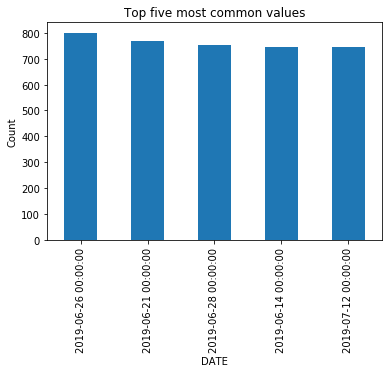



BOROUGH
Number of unique values: 5
The most common value: BROOKLYN
The least common value: STATEN ISLAND
The number of null values: 17838


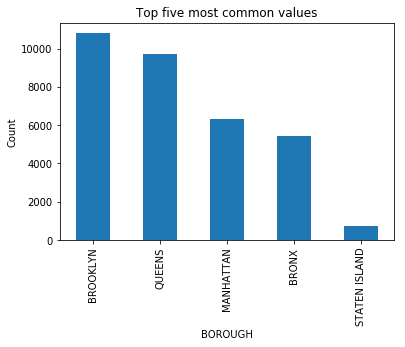



NUMBER OF PERSONS INJURED
Number of unique values: 0.0
The most common value: 18
The least common value: 0
The number of null values: 0


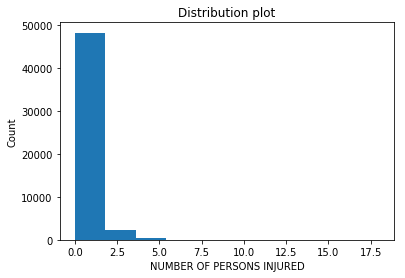



NUMBER OF PERSONS KILLED
Number of unique values: 0.0
The most common value: 2
The least common value: 0
The number of null values: 0


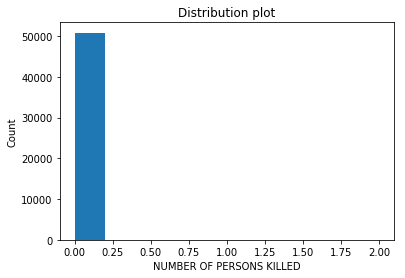



CONTRIBUTING FACTOR VEHICLE 1
Number of unique values: 55
The most common value: Driver Inattention/Distraction
The least common value: Headlights Defective
The number of null values: 139


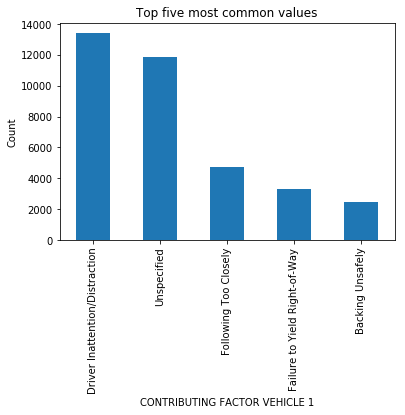



VEHICLE TYPE CODE 1
Number of unique values: 168
The most common value: Sedan
The least common value: Tow Truck
The number of null values: 257


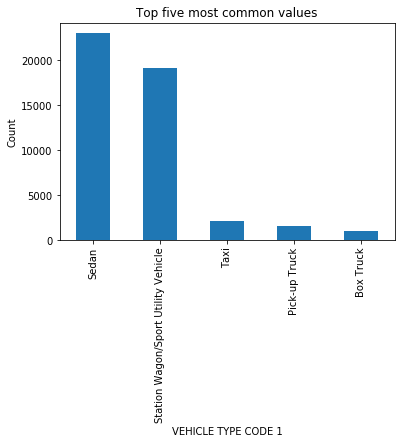

In [70]:
explore(df)